Компания «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Нужно изучить предпочтения пользователей, покупающих билеты на те или иные направления.
У нас есть два набора данных: 
* модели самолетов и количество рейсов для каждой модели
* города и среднее количество рейсов, прибывающих в каждый из них, за день


В ходе работы мы изучим имеющиеся данные, определим топ-10 городов по количеству рейсов и построим графики для каждой таблицы.

# Аналитика в авиакомпании
## Оглавление:
* [Импортировать файлы и изучить данные в них](#first-bullet)
* [Проверить типы данных на корректность](#second-bullet)
* [Построить графики](#third-bullet)
* [Вывод](#fourth-bullet)


### Импортировать файлы и изучить данные в них. <a name="first-bullet"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
model = pd.read_csv('/datasets/query_1.csv')
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [2]:
city = pd.read_csv('/datasets/query_3.csv')
city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


В первой таблице (model) содержится информация о модели самолета и количестве рейсов для каждой модели в сентябре 2018г. Вторая таблица (city) состоит из 101 строки и 2 столбцов, в которых содержится информация о городах и среднем количестве рейсов, прибывающих в них в августе 2018 года.

### Проверить типы данных на корректность <a name="second-bullet"></a>

In [3]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
city.duplicated().sum()

0

В таблицах нет пропусков, типы данных корректны: в названиях моделей самолетов и городов содержатся данные типа object, количество рейсов - целое число, а средние значения имеют тип float64.

### Построить графики <a name="third-bullet"></a>

Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.

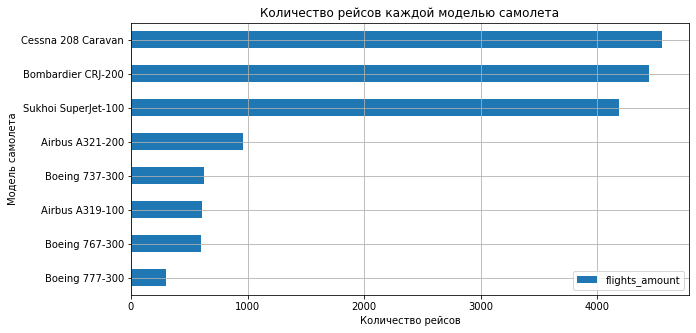

In [6]:
model.sort_values('flights_amount').plot(x='model', y='flights_amount', kind='barh', grid=True, figsize=(10, 5))
plt.title('Количество рейсов каждой моделью самолета')
plt.ylabel('Модель самолета')
plt.xlabel('Количество рейсов')
plt.show()

Больше всего рейсов совершаются на моделях самолетов Cessna208, Bombardier CRJ-200, Sukhoi Superjet-100 - как минимум, в четыре раза больше, чем на других моделях. Скорее всего это связано с тем, что эти модели с небольшой вместимостью пассажиров и летают на небольшие расстояния, поэтому выполняют рейсы чаще самолетов с большей вместимостью. В случае с моделями с одинаковой вместимостью: Sukhoi и Airbus A319 - значительная разница в количестве полетов, скорее всего связана с тем, что в России чаще используют самолеты российского производства из-за значительной разницы в стоимости этих моделей.  

In [7]:
# Добавим в таблицу данные о вместимости каждой модели.
passenger_capacity = pd.DataFrame([['Cessna 208 Caravan',13], ['Bombardier CRJ-200',50], ['Sukhoi SuperJet-100',108], ['Airbus A321-200',170], ['Boeing 737-300',150], ['Boeing 777-300',550], ['Boeing 767-300',325],['Airbus A319-100',116]], columns=['model', 'capacity'])
model = model.merge(passenger_capacity)

In [8]:
# Рассчитаем количество перевезенных пассажиров для каждой модели.
model['passenger_traffic'] = model['capacity'] * model['flights_amount']
model.sort_values('passenger_traffic', ascending=False)

,model,flights_amount,capacity,passenger_traffic
7,Sukhoi SuperJet-100,4185,108,451980
5,Bombardier CRJ-200,4446,50,222300
3,Boeing 767-300,600,325,195000
4,Boeing 777-300,300,550,165000
1,Airbus A321-200,960,170,163200
2,Boeing 737-300,630,150,94500
0,Airbus A319-100,607,116,70412
6,Cessna 208 Caravan,4557,13,59241


Если предположить, что все билеты на рейсы были проданы, то явным лидером по количеству перевозимых пассажиров становится Sukhoi SuperJet-100, который по  количеству совершаемых рейсов на третьем месте. А вот лидер по количеству рейсов (Cessna 208 Caravan) в итоге перевозит меньше всего пассажиров - 59241.

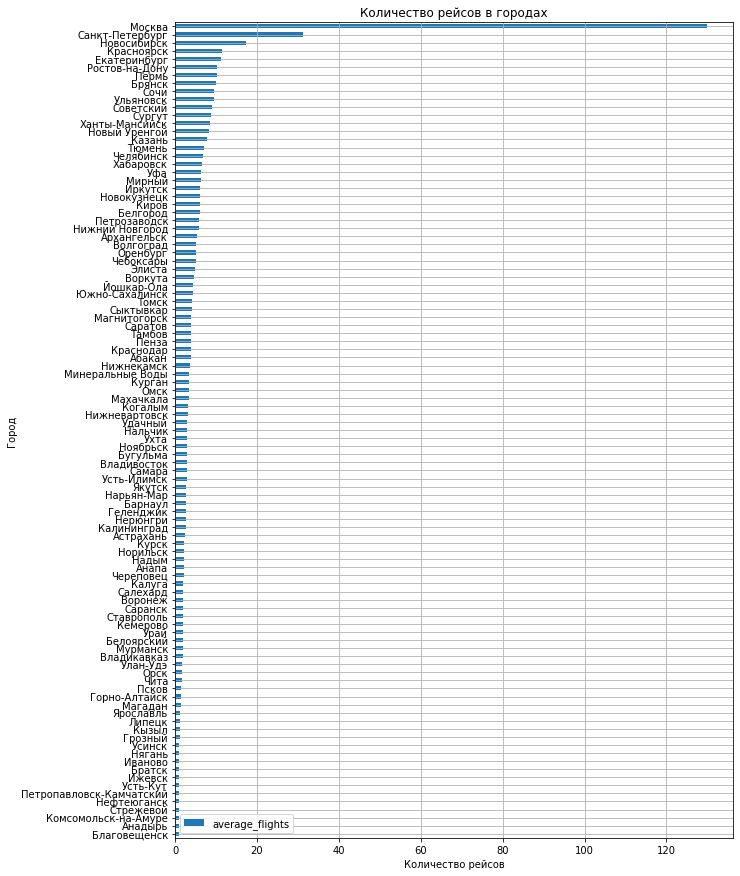

In [9]:
city\
    .sort_values('average_flights')\
    .plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(10, 15))
plt.title('Количество рейсов в городах')
plt.ylabel('Город')
plt.xlabel('Количество рейсов')
plt.show()

Примерно в 70% городов среднее количество прибывающих рейсов за день меньше пяти.

ТОП-10 городов по количеству рейсов.

In [10]:
top_city = city.sort_values(by='average_flights', ascending=False).head(10)
top_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


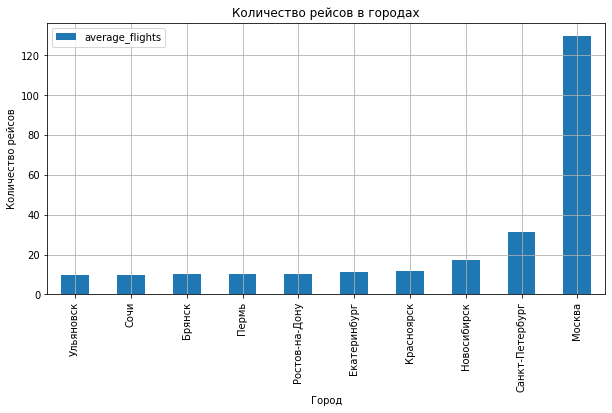

In [11]:
top_city\
    .sort_values('average_flights')\
    .plot(x='city', y='average_flights', kind='bar', grid=True, figsize=(10, 5))
plt.title('Количество рейсов в городах')
plt.xlabel('Город')
plt.ylabel('Количество рейсов')
plt.show()

По среднему количеству рейсов в день лидирует Москва с почти 130 рейсами в день. Количество аэропортов в столице больше, а цены на перелет из Москвы, как правило ниже, поэтому многие путешествуют через Москву. У остальных городов этот показатель гораздо скромнее. В тройке лидеров после Москвы идут Санкт-Петербург и Новосибирск. Это три крупнейшие города России по численности населения, лигично, что и пассажиропоток в них больше. Кроме того, из-за расположения, через Новосибирск наверняка удобно добираться с Дальнего Востока до столицы, а иногда и дешевле.

Добавим в таблицу с городами из топ-10 данные о численности населения и посчитаем корреляцию между численностью и средним количеством прибывающих рейсов в день.

In [12]:
population = pd.DataFrame([['Москва', 12692466], ['Санкт-Петербург', 5398064], ['Новосибирск', 1625631], ['Красноярск', 1093771], ['Екатеринбург', 1493771], ['Ростов-на-Дону', 1137904], ['Пермь', 1055397], ['Брянск', 402675], ['Сочи', 443563], ['Ульяновск', 627705]], columns=['city', 'population'])
top_city = top_city.merge(population)
top_city['average_flights'].corr(top_city['population'])

0.9766132789457698

Корреляция 0,97 говорит о прямой зависимости среднего количества прибывающих рейсов от численности населения города. 

### Вывод <a name="fourth-bullet"></a>

Больше всего рейсов совершаются на моделях самолетов Cessna208, Bombardier CRJ-200, Sukhoi Superjet-100 - как минимум, в четыре раза больше, чем на других моделях. Скорее всего это связано с тем, что эти самолеты с небольшой вместимостью пассажиров и летают на небольшие расстояния, поэтому выполняют рейсы чаще самолетов с большей вместимостью. В случае с моделями с одинаковой вместимостью: Sukhoi и Airbus A321 - значительная разница в количестве полетов, скорее всего связана с тем, что в России чаще используют самолеты российского производства из-за значительной разницы в стоимости этих моделей.  

Примерно в 70% городов среднее количество прибывающих рейсов за день меньше пяти. По среднему количеству рейсов в день лидирует Москва с почти 130 рейсами в день. Количество аэропортов в столице больше, а цены на перелет из Москвы, как правило ниже, поэтому многие путешествуют через Москву. У остальных городов этот показатель гораздо скромнее. В тройке лидеров после Москвы идут Санкт-Петербург и Новосибирск. Это три крупнейшие города России по численности населения, лигично, что и пассажиропоток в них больше. Кроме того, из-за расположения, через Новосибирск наверняка удобно добираться с Дальнего Востока до столицы, а иногда и дешевле.